<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


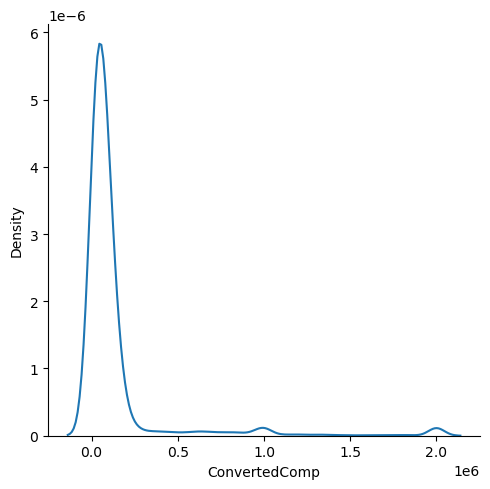

In [3]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

converted_c = df['ConvertedComp']

sns.displot(data=converted_c, kind="kde")



Plot the histogram for the column `ConvertedComp`.


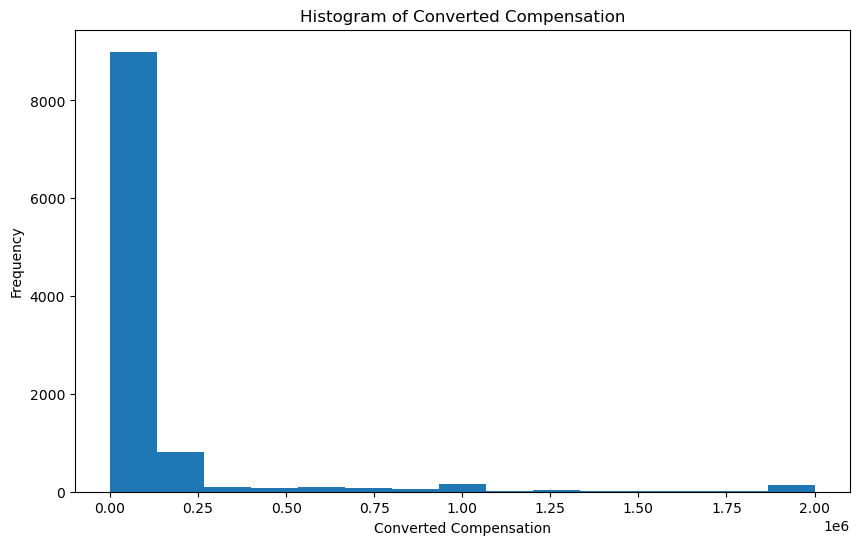

In [4]:
# your code goes here
converted_c.plot(kind="hist",
        figsize=(10,6),
        bins=15)
plt.title("Histogram of Converted Compensation")
plt.xlabel("Converted Compensation")
plt.show()

What is the median of the column `ConvertedComp`?


In [20]:
# your code goes here
print(f"The median ConvertedComp is {converted_c.median()}")
print("-----------------------")
print(f"The median age of survey responders is: {df['Age'].median()}")

The median ConvertedComp is 57745.0
-----------------------
The median age of survey responders is: 29.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
gender = df['Gender'].value_counts()

print(f"{gender['Man']} responders identified themselves only as a man")

10480 responders identified themselves only as a man


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
df_responders = df[['Gender','ConvertedComp']]
woman_responders = df_responders[df_responders['Gender'] == 'Woman']
woman_responders.median(numeric_only=True)

ConvertedComp    57708.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
print(f"Min: {df['Age'].min()}")
print(f"Median: {df['Age'].median()}")
print(f"Q1: {df['Age'].quantile(.25)}")
print(f"Q3: {df['Age'].quantile(.75)}")
print(f"Max: {df['Age'].max()}")



Min: 16.0
Median: 29.0
Q1: 25.0
Q3: 35.0
Max: 99.0


Plot a histogram of the column `Age`.


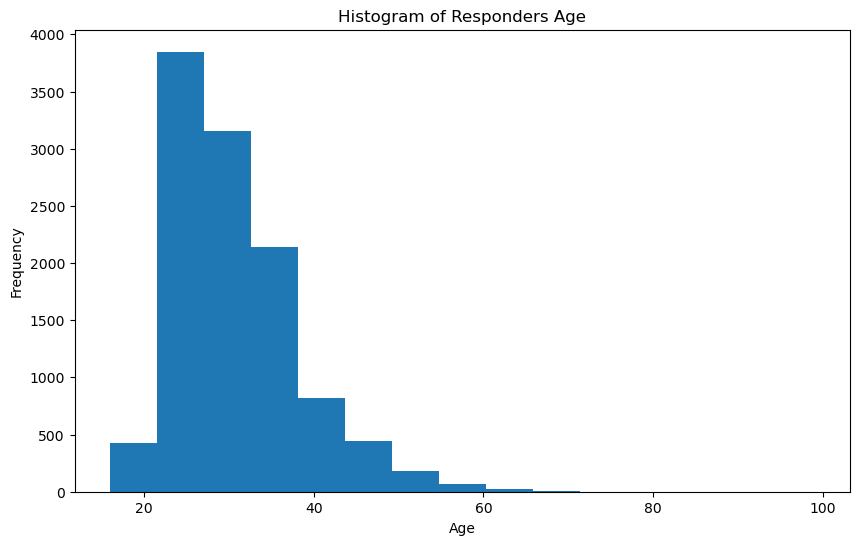

In [21]:
# your code goes here
df['Age'].plot(kind="hist",
                bins=15,
                figsize=(10,6)
                )
plt.title("Histogram of Responders Age")
plt.xlabel("Age")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


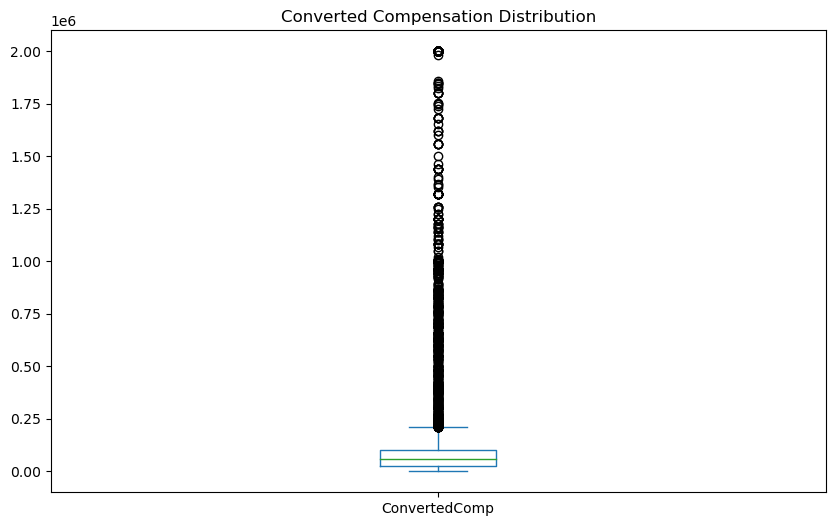

In [33]:
# your code goes here
converted_c.plot(kind="box", figsize=(10,6))
plt.title("Converted Compensation Distribution")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)

iqr = q3 - q1
print(f"The interquartile range is: {iqr}")

The interquartile range is: 73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print(f"Upper bound: {max_val}")
print(f"Lower bound: {min_val}")

Upper bound: 2000000.0
Lower bound: 0.0


Identify how many outliers are there in the `ConvertedComp` column.


ConvertedComp
Outliers below are: 0
Outliers above are: 879
-----------------------------------------------


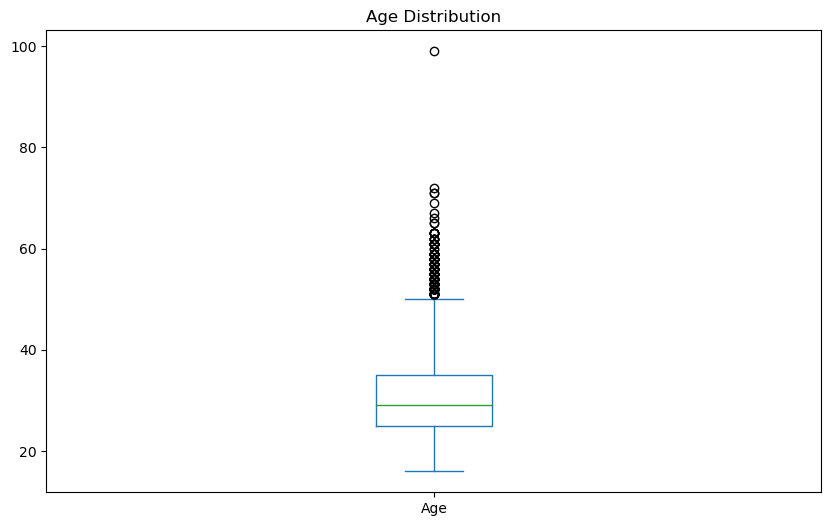

There are 0 outliers below Q1 for age


In [32]:
# your code goes here
outlier_threshold = 1.5

outliers_below = df[df['ConvertedComp'] < (q1 - outlier_threshold * iqr)].shape[0]
outliers_above = df[df['ConvertedComp'] > (q3 + outlier_threshold * iqr)].shape[0]

print("ConvertedComp")
print(f"Outliers below are: {outliers_below}")
print(f"Outliers above are: {outliers_above}")

print("-----------------------------------------------")

df['Age'].plot(kind="box", figsize=(10,6))
plt.title("Age Distribution")
plt.show()
print(f"There are 0 outliers below Q1 for age")


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [27]:
# your code goes here
new_df = df[df['ConvertedComp'] <= (q3 + outlier_threshold * iqr)]

print(f"Original dataframe had {df['ConvertedComp'].shape[0]} rows")
print(f"The new dataframe has: {new_df.shape[0]} rows")

print("-----------------------------")
print(f"The median ConvertedComp without outliers is: {new_df['ConvertedComp'].median()}")
print(f"The mean ConvertedComp without outliers is: {new_df['ConvertedComp'].mean()}")



Original dataframe had 11398 rows
The new dataframe has: 9703 rows
-----------------------------
The median ConvertedComp without outliers is: 52704.0
The mean ConvertedComp without outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# your code goes here
df.corrwith(df['Age'])

C:\Users\fredd\AppData\Local\Temp\ipykernel_3436\986352737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Age'])


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
